<a href="https://colab.research.google.com/github/derek-byte/Sololearn-Machine-Learning/blob/main/Random_Forest_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lesson 39.1: Random Forests With Scikit-Learn

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

cancer_data = load_breast_cancer()

print(cancer_data.keys())

df = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

first_row = X_test[0]

# Random forest results
print("Prediction", rf.predict([first_row]))
print("True Value", y_test[0])
print("random forest accuracy", rf.score(X_test, y_test))

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision tree accuracy", dt.score(X_test, y_test))

ft_imp = pd.Series(rf.feature_importances_,
                   index=cancer_data.feature_names).sort_values(ascending=False)
ft_imp.head(10)

# After doing ft_imp.head(10), get the worst columns
worst_cols = ['worst perimeter', 'worst radius', 'worst area', 'worst concave points', 'worst concavity']
print("Worst Columns", worst_cols)

X_worst = df[worst_cols]
X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state=101)

dt.fit(X_train, y_train)
print("Decision tree accuracy", dt.score(X_test, y_test))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Prediction [1]
True Value 1
random forest accuracy 0.972027972027972
Decision tree accuracy 0.9020979020979021
Worst Columns ['worst perimeter', 'worst radius', 'worst area', 'worst concave points', 'worst concavity']
Decision tree accuracy 0.9300699300699301


Lesson 40.1: Tuning a Random Forest

best params: {'n_estimators': 98}


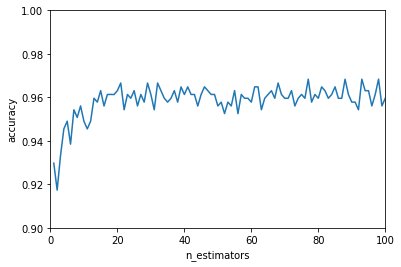

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Scikit-learn has built in a Grid Search class to help us find the optimal choice of parameters
# n_estimators is number of trees

n_estimators = list(range(1, 101))
param_grid = {'n_estimators': n_estimators,}
# param_grid = {'n_estimators': [10, 25, 50, 75, 100],}
rf = RandomForestClassifier()

# We set cv=5 for 5-fold cross validation
gs = GridSearchCV(rf, param_grid, cv=5)

gs.fit(X, y)

print("best params:", gs.best_params_)
# best params: {'n_estimators': 50}

scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()

# After looking at the graph, we see where the graph levels off and use the x value as n_estimators (optimal number of trees)

Lesson 42.1: Random Forests Pros & Cons

In [16]:
from sklearn.datasets import make_circles
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
kf = KFold(n_splits=5, shuffle=True, random_state=1)
lr_scores = []
rf_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    lr_scores.append(lr.score(X_test, y_test))
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))

print("LR accuracy:", np.mean(lr_scores))
print("RF accuracy:", np.mean(rf_scores))

"""
When looking to get a benchmark for a new classification problem, it is common
practice to start by building a Logistic Regression model and a Random Forest 
model as these two models both have potential to perform well without any tuning. 
This will give you values for your metrics to try to beat. Oftentimes it is 
almost impossible to do better than these benchmarks.
"""

LR accuracy: 0.36
RF accuracy: 0.82


- Control number of trees in Random Forest: n_estimators
- Max features: 'max_features'
- Max features and trees are in param_grid: 'param grid'

Final Project

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

random_state = int(input())
n = int(input())
rows = []
for i in range(n):
    rows.append([float(a) for a in input().split()])

X = np.array(rows)
y = np.array([int(a) for a in input().split()])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
rf = RandomForestClassifier(n_estimators=5, random_state=random_state)

rf.fit(X_train, y_train)

print(rf.predict(X_test))

# Notes: 
# random_state is needed in initializing variables and random forest classifier
# random_state ensures that the process will output the same results every time